# Support Vector Machine

Objective: Predicting nursery status  
Dataset: nursery.data  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('nursery.data', header=None)
print(data.shape)
data.head()

(12960, 9)


,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [2]:
#rename column
data.columns = ['Eval','ParentEmploy','Nursery','Children','Form','Housing','Finance','Social','Health']
data.head()

,Eval,ParentEmploy,Nursery,Children,Form,Housing,Finance,Social,Health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


## Data Exploration

usual          4320
pretentious    4320
great_pret     4320
Name: Eval, dtype: int64


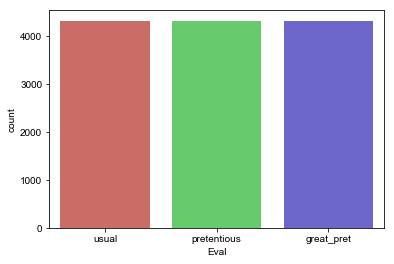

In [3]:
print(data['Eval'].value_counts())

sns.countplot(x='Eval',data = data, palette='hls',order = data['Eval'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

less_proper    2592
proper         2592
improper       2592
critical       2592
very_crit      2592
Name: ParentEmploy, dtype: int64


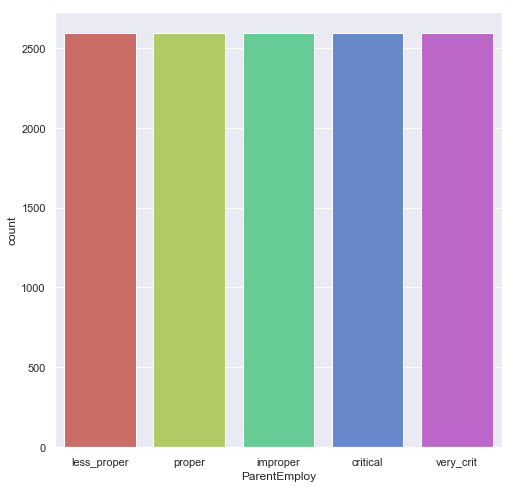

In [4]:
print(data['ParentEmploy'].value_counts())

sns.countplot(x='ParentEmploy',data = data, palette='hls',order = data['ParentEmploy'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

foster        3240
completed     3240
incomplete    3240
complete      3240
Name: Nursery, dtype: int64


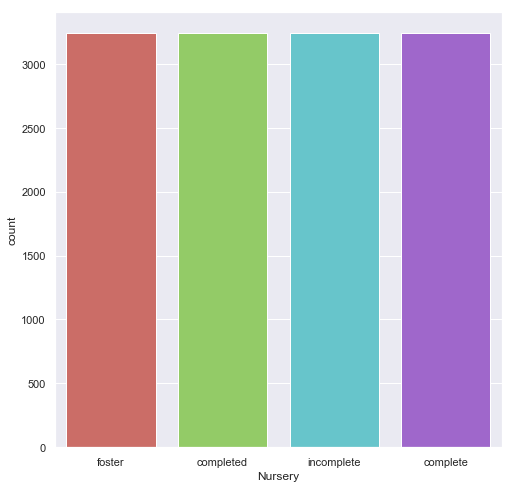

In [5]:
print(data['Nursery'].value_counts())

sns.countplot(x='Nursery',data = data, palette='hls',order = data['Nursery'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

1       3240
3       3240
more    3240
2       3240
Name: Children, dtype: int64


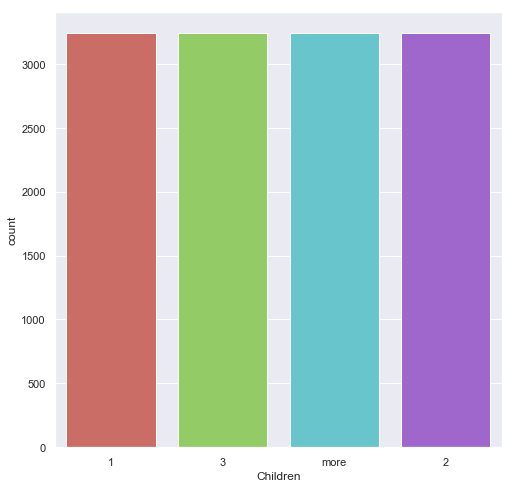

In [6]:
print(data['Children'].value_counts())

sns.countplot(x='Children',data = data, palette='hls',order = data['Children'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

less_conv     4320
convenient    4320
critical      4320
Name: Form, dtype: int64


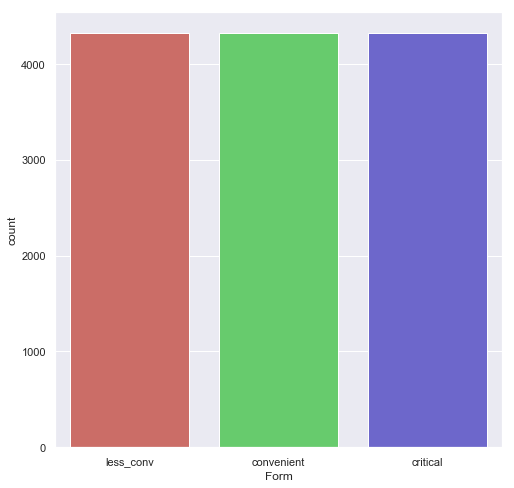

In [7]:
print(data['Form'].value_counts())

sns.countplot(x='Form',data = data, palette='hls',order = data['Form'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

inconv        6480
convenient    6480
Name: Housing, dtype: int64


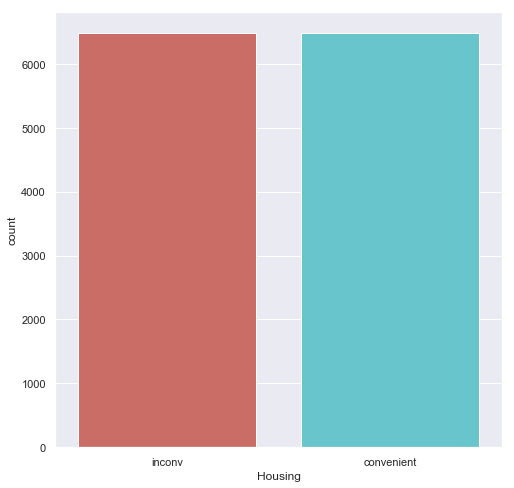

In [8]:
print(data['Housing'].value_counts())

sns.countplot(x='Housing',data = data, palette='hls',order = data['Housing'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

problematic      4320
nonprob          4320
slightly_prob    4320
Name: Finance, dtype: int64


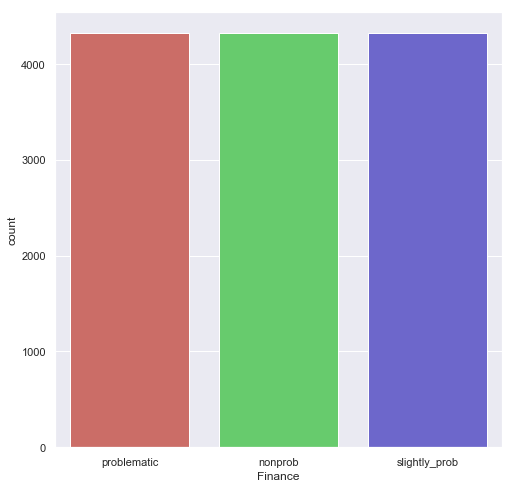

In [9]:
print(data['Finance'].value_counts())

sns.countplot(x='Finance',data = data, palette='hls',order = data['Finance'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

recommended    4320
priority       4320
not_recom      4320
Name: Social, dtype: int64


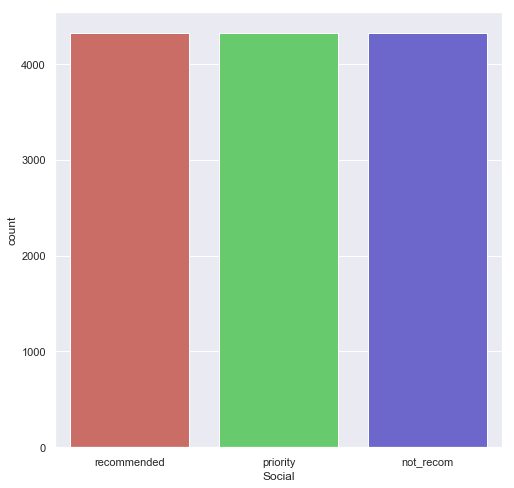

In [10]:
print(data['Social'].value_counts())

sns.countplot(x='Social',data = data, palette='hls',order = data['Social'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: Health, dtype: int64


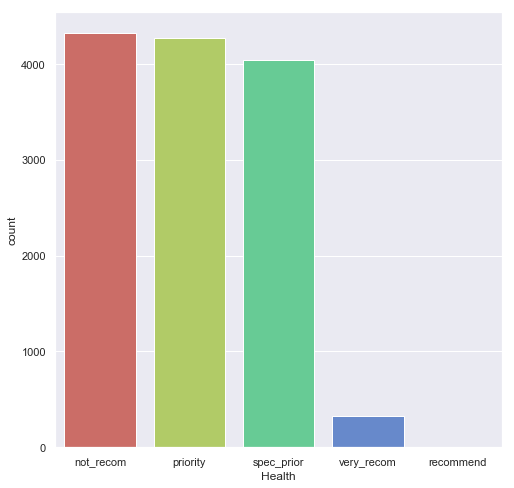

In [11]:
print(data['Health'].value_counts())

sns.countplot(x='Health',data = data, palette='hls',order = data['Health'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [12]:
data.head()

,Eval,ParentEmploy,Nursery,Children,Form,Housing,Finance,Social,Health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [13]:
data["Eval"] = data["Eval"].astype('category')
data["Eval#"] = data["Eval"].cat.codes

data["ParentEmploy"] = data["ParentEmploy"].astype('category')
data["ParentEmploy#"] = data["ParentEmploy"].cat.codes

data["Nursery"] = data["Nursery"].astype('category')
data["Nursery#"] = data["Nursery"].cat.codes

data["Form"] = data["Form"].astype('category')
data["Form#"] = data["Form"].cat.codes

data["Housing"] = data["Housing"].astype('category')
data["Housing#"] = data["Housing"].cat.codes

data["Finance"] = data["Finance"].astype('category')
data["Finance#"] = data["Finance"].cat.codes

data["Social"] = data["Social"].astype('category')
data["Social#"] = data["Social"].cat.codes

data["Health"] = data["Health"].astype('category')
data["Health#"] = data["Health"].cat.codes

data["Children"] = data["Children"].astype('category')
data["Children#"] = data["Children"].cat.codes

data.head()

,Eval,ParentEmploy,Nursery,Children,Form,Housing,Finance,Social,Health,Eval#,ParentEmploy#,Nursery#,Form#,Housing#,Finance#,Social#,Health#,Children#
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,2,3,0,0,0,0,2,2,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,2,3,0,0,0,0,1,1,0
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,2,3,0,0,0,0,0,0,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,2,3,0,0,0,2,2,2,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,2,3,0,0,0,2,1,1,0


## Correlation

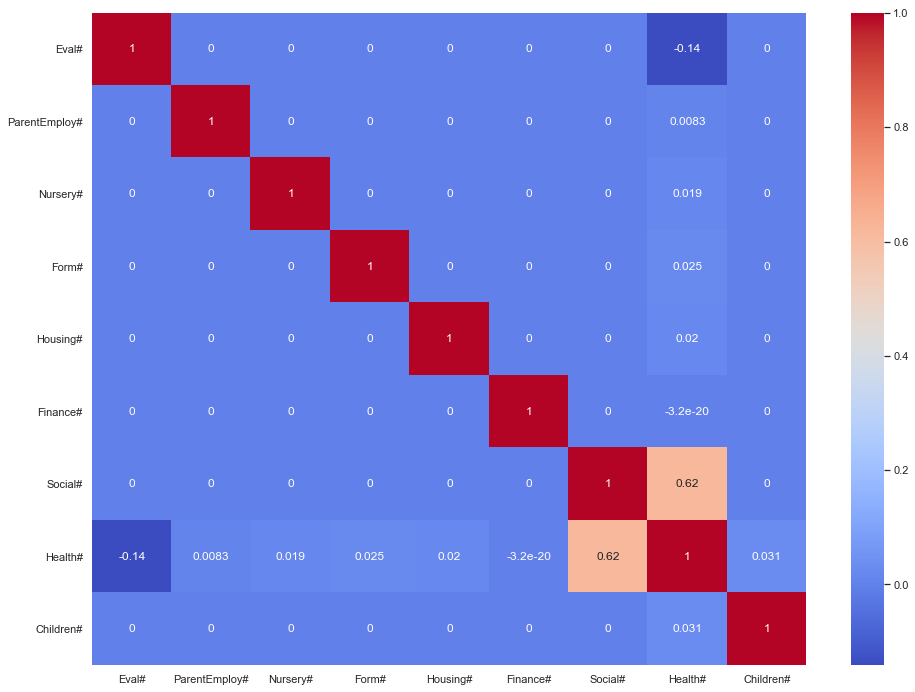

In [14]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [15]:
corr_rank = data.corr()
corr_rank["Eval#"].sort_values(ascending=False)

Eval#            1.000000
Children#        0.000000
Social#          0.000000
Finance#         0.000000
Housing#         0.000000
Form#            0.000000
Nursery#         0.000000
ParentEmploy#    0.000000
Health#         -0.141516
Name: Eval#, dtype: float64

## Data Processing and Selection

In [17]:
X = data[['ParentEmploy#','Nursery#','Form#','Housing#','Finance#','Social#','Health#','Children#']].values
print('Feature Dataset', X.shape)
print(X[0:2])

#Target dataset
y = data["Eval#"]
print('Target Dataset', y.shape)
print(y[0:5])

Feature Dataset (12960, 8)
[[3 0 0 0 0 2 2 0]
 [3 0 0 0 0 1 1 0]]
Target Dataset (12960,)
0    2
1    2
2    2
3    2
4    2
Name: Eval#, dtype: int8


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (12960, 8)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.70710678, -1.34164079, -1.22474487, -1.        , -1.22474487,
         1.22474487,  0.48925783, -1.34164079],
       [ 0.70710678, -1.34164079, -1.22474487, -1.        , -1.22474487,
         0.        , -0.28344281, -1.34164079]])

## Split Train Test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Default Parameter
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(gamma='auto') #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Kernel Accuracy Score')
print('- Default:',round(metrics.accuracy_score(y_test,y_pred),4))

#Linear Kernel
svc=SVC(kernel='linear', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- Linear :',round(metrics.accuracy_score(y_test,y_pred),4))

#RBF Kernel
svc=SVC(kernel='rbf', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- RBF    :', round(metrics.accuracy_score(y_test,y_pred),4))

#Polynomial kernel
svc=SVC(kernel='poly', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- Polynomial:', round(metrics.accuracy_score(y_test,y_pred),4))

Kernel Accuracy Score
- Default: 0.3839
- Linear : 0.4178
- RBF    : 0.3839
- Polynomial: 0.4182


In [20]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

accuracy_score= metrics.accuracy_score(y_test,y_predict)
print('Linear accuracy score:', round(accuracy_score,4))

Linear accuracy score: 0.4178
